# GPU Computing for Data Scientists
#### Using CUDA, Jupyter, PyCUDA, ArrayFire and Thrust


https://github.com/QuantScientist/Data-Science-ArrayFire-GPU

In [7]:
# !pip install pycuda
%reset -f
import numpy
import numpy as np

# imports
import numpy as np                     # numeric python lib
import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour
import scipy.ndimage as ndi            # to determine shape centrality
# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

import tensorflow as tf 
print("tensorflow:" + tf.__version__)
!set "KERAS_BACKEND=tensorflow"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import caffe
import cv2

from pycuda.compiler import SourceModule

import pycuda
from pycuda import compiler
import pycuda.driver as cuda

tensorflow:1.2.1


# Init CUDA

In [9]:
cuda.init()
print("%d device(s) found." % cuda.Device.count())           
for ordinal in range(cuda.Device.count()):
    dev = cuda.Device(ordinal)
    print "Device #%d: %s" % (ordinal, dev.name())    
print cuda

1 device(s) found.
Device #0: GeForce GTX 1080
<module 'pycuda.driver' from '/usr/local/lib/python2.7/dist-packages/pycuda/driver.pyc'>


# Init CAFFE with a GPU backend

In [10]:
from caffe import layers as L
from caffe import params as P
caffe.set_device(0)
caffe.set_mode_gpu()
# http://christopher5106.github.io/deep/learning/2015/09/04/Deep-learning-tutorial-on-Caffe-Technology.html



-  Maximum thread size for GPU is dependent on GPU, but normally 512.
-  Threads per block should be a multiple of 32.
-  Block and Grid Size is dependent on the image.
-  This example uses a 256x256 pixel image. A 2D block (16x16) and a 1D grid (256,1) is used

## Python CPU image processing

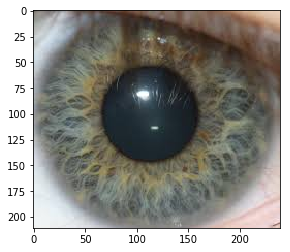

In [17]:
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

#Read image
im = Image.open('images/iris1.jpeg')
#Display image
imshow(np.asarray(im))

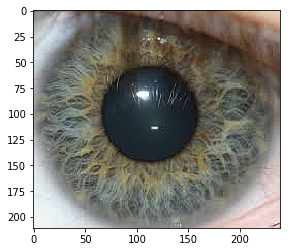

In [18]:
#Applying a filter to the image
im_sharp = im.filter( ImageFilter.SHARPEN )
imshow(np.asarray(im_sharp))
#Saving the filtered image to a new file
# im_sharp.save( 'image_sharpened.jpg', 'JPEG' )

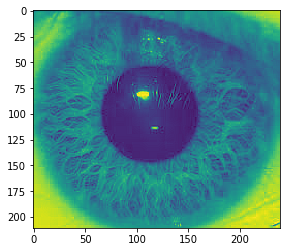

In [19]:
# Splitting the image into its respective bands, i.e. Red, Green,
#and Blue for RGB
r,g,b = im_sharp.split()
imshow(np.asarray(r))
#Viewing EXIF data embedded in image
exif_data = im._getexif()
exif_data

In [6]:
import numpy as np
# from scipy.misc import imread, imsave
import pycuda.autoinit
import pycuda.driver as drv
from pycuda.compiler import SourceModule


# Maximum thread size for GPU is dependent on GPU, but normally 512.
# Threads per block should be a multiple of 32.
# Block and Grid Size is dependent on the image.
# This example uses a 256x256 pixel image. A 2D block (16x16) and a 1D grid (256,1) is used

#Read in image
img = imread('images/iris1.jpeg', flatten=True).astype(np.float32)

# __global__ __device__ void medianFilter(float *result, float *img, int w, int h) {
#     //2D Blocks, 1D Grid. Finding respective index
#     int i = blockIdx.x * blockDim.x * blockDim.y + threadIdx.y * blockDim.x + threadIdx.x;
#     // Keeping the edge pixels the same
#     if (i < w || i > w * (h-1)-1 || i % (w-1) == 0 ) {
#         result[i] = img[i];
#     }
#     else {       
#         result[i] = pixel11;
        
    
# medianFilter = mod.get_function("medianFilter")
# #This will need tweaking based on your image
# blockWidth = np.int32(img.shape[1]/16)
# blockHeight = np.int32(img.shape[0]/16)
# gridSize = np.int32((img.shape[0] * img.shape[1])/(blockWidth * blockHeight))

# #Empty array for computation output
# result = np.zeros_like(img)
# #Kernel execution
# medianFilter(drv.Out(result), drv.In(img),np.int32(img.shape[1]),np.int32(img.shape[0]), block=(blockWidth,blockHeight,1), grid=(gridSize,1))
# imsave('medianFilter-CUDA.jpg',result)

In [7]:
img

array([[ 100.16999817,  104.16999817,  110.81099701, ...,  213.19500732,
         214.19500732,  215.19500732],
       [ 110.16999817,  114.16999817,  119.81099701, ...,  212.19500732,
         213.19500732,  214.19500732],
       [ 121.81099701,  125.81099701,  130.81100464, ...,  210.67900085,
         210.67900085,  211.67900085],
       ..., 
       [ 241.28799438,  241.28799438,  241.28799438, ...,  202.05799866,
         203.83000183,  204.84100342],
       [ 240.28799438,  241.28799438,  241.28799438, ...,  219.83000183,
         211.83000183,  205.31399536],
       [ 240.28799438,  240.28799438,  241.28799438, ...,  213.83000183,
         202.83000183,  197.31399536]], dtype=float32)